# Applying LogisticRegression
### Directly on Given Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
train=pd.read_csv('Train.csv',index_col=0)
test=pd.read_csv('Test.csv', index_col=0)

In [4]:
train.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
619,2,50,12500,98,1
664,0,13,3250,28,1
441,1,16,4000,35,1
160,2,20,5000,45,1
358,1,24,6000,77,0


In [5]:
test.head()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
659,2,12,3000,52
276,21,7,1750,38
263,4,1,250,4
303,11,11,2750,38
83,4,12,3000,34


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 619 to 74
Data columns (total 5 columns):
Months since Last Donation     576 non-null int64
Number of Donations            576 non-null int64
Total Volume Donated (c.c.)    576 non-null int64
Months since First Donation    576 non-null int64
Made Donation in March 2007    576 non-null int64
dtypes: int64(5)
memory usage: 27.0 KB


In [12]:
test.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation
count,200.00000,200.000000,200.000000,200.000000
mean,9.49500,5.935000,1483.750000,35.475000
std,7.61907,6.125224,1531.305955,25.111197
min,0.00000,1.000000,250.000000,2.000000
25%,4.00000,2.000000,500.000000,14.000000
50%,7.00000,4.000000,1000.000000,31.000000
75%,14.00000,8.000000,2000.000000,52.000000
max,40.00000,41.000000,10250.000000,98.000000


In [13]:
train.describe()

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000
mean,9.439236,5.427083,1356.770833,34.050347,0.239583
std,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.000000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,49.250000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 659 to 154
Data columns (total 4 columns):
Months since Last Donation     200 non-null int64
Number of Donations            200 non-null int64
Total Volume Donated (c.c.)    200 non-null int64
Months since First Donation    200 non-null int64
dtypes: int64(4)
memory usage: 7.8 KB


In [15]:
from sklearn.preprocessing import StandardScaler
train_scaled=StandardScaler().fit_transform(train)
test_scaled=StandardScaler().fit_transform(test)

/home/subham/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/subham/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/subham/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/subham/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [16]:
train_scaled

array([[-0.91073873,  7.77205216,  7.77205216,  2.6418237 ,  1.78154793],
       [-1.15558611,  1.32046785,  1.32046785, -0.24994586,  1.78154793],
       [-1.03316242,  1.84356928,  1.84356928,  0.0392311 ,  1.78154793],
       ...,
       [ 1.41531137, -0.59757073, -0.59757073,  0.74151799, -0.56130962],
       [ 3.61893779, -0.77193788, -0.77193788,  0.20447507, -0.56130962],
       [ 7.65891955, -0.77193788, -0.77193788,  1.56773787, -0.56130962]])

In [35]:
train_scaled.dtype,test_scaled.dtype

(dtype('float64'), dtype('float64'))

In [17]:
test_scaled

array([[-0.98618442,  0.99265264,  0.99265264,  0.65972434],
       [ 1.51381612,  0.17430751,  0.17430751,  0.10080508],
       [-0.72302647, -0.80770664, -0.80770664, -1.25657026],
       [ 0.19802636,  0.82898361,  0.82898361,  0.10080508],
       [-0.72302647,  0.99265264,  0.99265264, -0.05888614],
       [-0.85460545,  2.46567387,  2.46567387,  0.2604963 ],
       [-0.72302647, -0.64403762, -0.64403762, -1.25657026],
       [ 0.59276329, -0.80770664, -0.80770664, -0.85734222],
       [ 1.77697407, -0.64403762, -0.64403762,  2.05702248],
       [ 0.59276329, -0.31669956, -0.31669956,  1.13879799],
       [ 0.46118431, -0.48036859, -0.48036859, -0.77749661],
       [ 0.19802636,  0.17430751,  0.17430751,  1.05895238],
       [-0.5914475 ,  0.82898361,  0.82898361,  1.57794883],
       [-0.72302647, -0.80770664, -0.80770664, -1.25657026],
       [-0.72302647, -0.31669956, -0.31669956, -0.37826857],
       [ 0.19802636, -0.80770664, -0.80770664, -0.97711063],
       [ 0.19802636,  0.

In [40]:
train_X=train_scaled[:,:4]
train_y=train_scaled[:,-1]
train_X.shape,train_y.shape

((576, 4), (576,))

In [25]:
j=0
for i in train_y:
    print(i)
    j=j+1
    if(j==5):
        break

1.781547934656337
1.781547934656337
1.781547934656337
1.781547934656337
-0.561309623247887


In [30]:
train_y[:5]

array([ 1.78154793,  1.78154793,  1.78154793,  1.78154793, -0.56130962])

In [38]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_X,train_y)

/home/subham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/subham/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [8]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_X,train_y.astype(int))

/home/subham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [9]:
predicted=logreg.predict_proba(test_scaled)
predicted_df=pd.DataFrame(predicted[:,1],index=test.index,columns=['Made Donation in March 2007'],dtype=float)
predicted_df.head()

,Made Donation in March 2007
659,0.447628
276,0.085981
263,0.295737
303,0.281267
83,0.478907


In [10]:
predicted_df.to_csv('sub1')

# Using KNeigbors Classifier

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
train=pd.read_csv('Train.csv',index_col=0)
test=pd.read_csv('Test.csv', index_col=0)
train_scaled=StandardScaler().fit_transform(train)
test_scaled=StandardScaler().fit_transform(test)
train_X=train_scaled[:,:4]
train_y=train_scaled[:,-1].astype(int)

/home/subham/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/subham/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/home/subham/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/subham/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_X,train_y,test_size=0.2,
                                                 stratify=train_y)

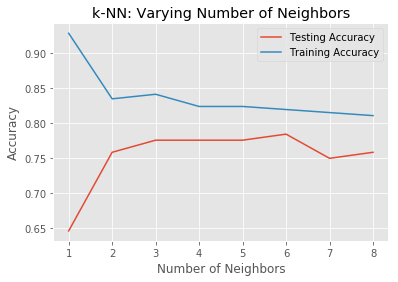

In [4]:
from sklearn.neighbors import KNeighborsClassifier
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


# From above graph it is clear that n_neighbors=6 is good choice

In [5]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(train_X,train_y)
predicted_values=knn.predict_proba(test_scaled)

In [6]:
predict_df=pd.DataFrame(predicted_values[:,1],index=test.index,columns=['Made Donation in March 2007'],dtype=float)
predict_df.head()

,Made Donation in March 2007
659,0.833333
276,0.166667
263,0.166667
303,0.000000
83,0.500000


In [7]:
predict_df.to_csv('sub2')